In [3]:
#Import libraries
import mne 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [182]:
#Create dictionary with all the data grouped by condition
    
#Create root folder argument for folders to loop through
root_folder = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\Epoched_Data'
os.chdir(root_folder)


DataB = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for folder in os.listdir(root_folder):
    for filename in os.listdir(folder): 
        file_path = os.path.join(folder, filename)
        with open(file_path,'rb') as g:
            raw = pickle.load(g)
        raw = mne.io.RawArray(raw)
        #Get the participant ID
        ID = filename.split('_',maxsplit=1)[0]
        #Get condition
        cond = '_'.join(filename.split('_')[1:-1])
        if 'EC' in cond:
            cond = 'EC'
        elif 'EO' in cond:
            cond = 'EO'
        #Add array element to dictionary
        DataB[cond][ID] = raw
nu_fold = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal' 

with open(nu_fold + '\\DataB.pkl', 'wb') as f:
        pickle.dump(DataB, f)
f.close()
        

TypeError: __init__() missing 1 required positional argument: 'info'

In [164]:
#Create dictionary with all the data grouped by condition
    
#Create root folder argument for folders to loop through
root_folder = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\Epoched_Data'
os.chdir(root_folder)


DataB_mne = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for folder in os.listdir(root_folder):
    for filename in os.listdir(folder): 
        file_path = os.path.join(folder, filename)
        with open(file_path,'rb') as g:
            raw = pickle.load(g)
        #Get the participant ID
        ID = filename.split('_',maxsplit=1)[0]
        #Get condition
        cond = '_'.join(filename.split('_')[1:-1])
        if 'EC' in cond:
            cond = 'EC'
        elif 'EO' in cond:
            cond = 'EO'
        #Add array element to dictionary
        DataB[cond][ID] = raw
nu_fold = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal' 

with open(nu_fold + '\\DataB_mne.pkl', 'wb') as f:
        pickle.dump(DataB, f)
f.close()

In [7]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataB = raw.copy()

In [4]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


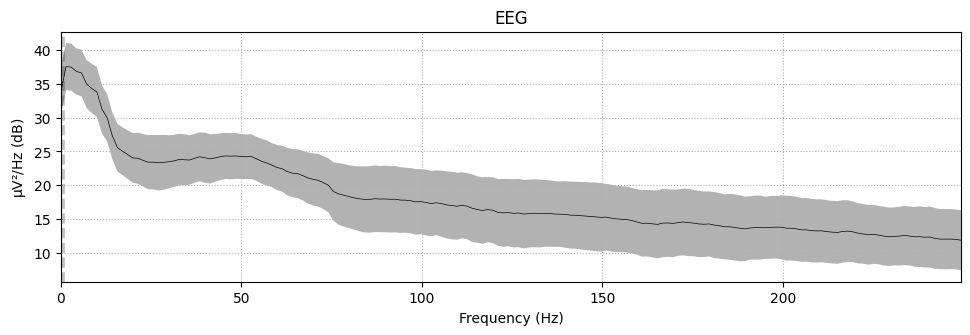

In [14]:
%matplotlib qt
DataB['EO']['2001'].compute_psd(method='multitaper').plot(average=True)
DataB['EC']['2001'].compute_psd(method='multitaper').plot(average=True)
DataB['SED_1']['2001'].compute_psd(method='multitaper').plot(average=True)

In [9]:

#file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
#with open(file_path,'rb') as g:
#            raw = pickle.load(g)
#DataA = raw.copy()
DataA_LowP = DataB.copy()
#Apply highpass filter
for key in DataB.keys():
    for per in DataB[key].keys():
        DataA_LowP[key][per] = DataB[key][per].filter(None,100,method='iir')

#Change the filename
nufilename = filename.split(".",maxsplit=1)[0]
nufilename = nufilename + "_LowPassed_mne.pkl"

##Assign new directory for storage in platon##
Dir1 = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\HighPassedData'
savepath = os.path.join(Dir1,folder)
FullSavePath = os.path.join(savepath,nufilename)

#Save the new file
#with open(FullSavePath, 'wb') as f:
#    pickle.dump(DataA_LowP, f) 
#
#f.close()
#g.close()     

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 dB

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 dB

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 dB

Setting up low-pass filter at 1e+02 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 100.00 Hz: -6.02 

NameError: name 'filename' is not defined

In [11]:
DataB['EC']['2001'].psd_array_multitaper().plot(average=True)
print(DataA['EC'])

AttributeError: 'Epochs' object has no attribute 'psd_array_multitaper'

In [32]:
%matplotlib qt

root_folder = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB.pkl"
#Loop through all the data and group the psd by condition, then plot the comparison
psdss = [[0],[0],[0],[0],[0],[0],[0],[0]]
t = 0
for cond in DataA.keys():
    i = 0
    pitstop = list()
    #if cond not in ['INDUCTION','EMERGENCE', 'SED_2', 'SED_3', 'EC', 'EO']:
    for pers in DataB[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataA[cond][pers],sfreq=500)
        pitstop.append(np.mean(np.mean(psds,axis=0),axis=0))
        i += 1
    psdss[t] = [np.mean(pitstop,axis=0)]
    t += 1 

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

In [34]:

plt.figure()
plt.plot(sfreq,list(np.array(psdss[0]).T),color='black',label='EO')
plt.plot(sfreq,list(np.array(psdss[1]).T),color='black',label='EC')
plt.plot(sfreq,list(np.array(psdss[2]).T),color='red',label='Induction')
plt.plot(sfreq,list(np.array(psdss[3]).T),color='red',label='SED_1')
plt.plot(sfreq,list(np.array(psdss[4]).T),color='red',label='SED_2')
plt.plot(sfreq,list(np.array(psdss[5]).T),color='red',label='SED_3')
plt.plot(sfreq,list(np.array(psdss[6]).T),color='red',label='SED_4')
plt.plot(sfreq,list(np.array(psdss[7]).T),color='black',label='Emergence')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.legend()
plt.show()